In [1]:
import pandas as pd

# Load the final cleaned dataset
df = pd.read_csv("../data/processed/lendingclub_cleaned_outliers_removed.csv")

# Preview structure
print("Shape:", df.shape)
df.head()


C:\Users\mahas\AppData\Local\Temp\ipykernel_55024\523382416.py:4: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/lendingclub_cleaned_outliers_removed.csv")


Shape: (2260701, 111)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,customer_tenure,ARPU,CLTV
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,178050.0,7746.0,2400.0,13734.0,N,Cash,N,115.0,38.449773,4421.723917
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,314017.0,39475.0,79300.0,24667.0,N,Cash,N,115.0,223.301391,25679.660000
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,...,218418.0,18696.0,6200.0,14877.0,N,Cash,N,115.0,197.442820,22705.924294
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,...,381215.0,52226.0,62500.0,18000.0,N,Cash,N,115.0,273.600087,31464.010000
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,439570.0,95768.0,20300.0,88097.0,N,Cash,N,115.0,102.091304,11740.500000


In [2]:
# Set churn_flag from loan_default (if not already done)
df['churn_flag'] = df['loan_default']

# Define target and initial features
target = 'churn_flag'

features = [
    'loan_amnt', 'annual_inc', 'installment',
    'int_rate', 'customer_tenure', 'ARPU', 'CLTV'
]

X = df[features]
y = df[target]

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())


KeyError: 'loan_default'

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only the features
X_scaled = scaler.fit_transform(X)

import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Confirm scaling
X_scaled_df.describe()


,loan_amnt,annual_inc,installment,int_rate,customer_tenure,ARPU,CLTV
count,1.345350e+06,1.345350e+06,1.345350e+06,1.345350e+06,1.345350e+06,1.345350e+06,1.345350e+06
mean,5.687088e-17,-8.605312e-16,-1.402759e-17,-1.541429e-15,-1.270933e-16,3.759140e-16,-2.722968e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.596859e+00,-1.090422e+00,-1.656297e+00,-1.662837e+00,-2.153687e+00,-1.396286e+00,-1.432043e+00
25%,-7.364804e-01,-4.357190e-01,-7.249909e-01,-7.317818e-01,-6.605492e-01,-7.532779e-01,-7.714604e-01
50%,-2.776120e-01,-1.608524e-01,-2.395492e-01,-1.047871e-01,-9.418637e-02,-2.608798e-01,-2.604135e-01
75%,6.401249e-01,1.966744e-01,5.454936e-01,5.767289e-01,5.751515e-01,5.103283e-01,5.565873e-01
max,2.934467e+00,1.562099e+02,4.901277e+00,3.722187e+00,4.951591e+00,5.347372e+00,4.682761e+00


In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes and class balance
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTarget Distribution (Train):")
print(y_train.value_counts(normalize=True))

print("\nTarget Distribution (Test):")
print(y_test.value_counts(normalize=True))


Training shape: (1076280, 7)
Test shape: (269070, 7)

Target Distribution (Train):
churn_flag
0    0.80035
1    0.19965
Name: proportion, dtype: float64

Target Distribution (Test):
churn_flag
0    0.800349
1    0.199651
Name: proportion, dtype: float64


Confusion Matrix:
[[214301   1049]
 [  6185  47535]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    215350
           1       0.98      0.88      0.93     53720

    accuracy                           0.97    269070
   macro avg       0.98      0.94      0.96    269070
weighted avg       0.97      0.97      0.97    269070

ROC AUC Score: 0.9807453073413711


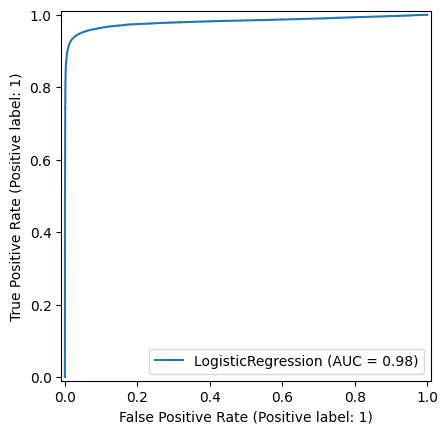

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))

# Plot ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)


In [7]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = [
    "loan_amnt", "annual_inc", "installment", 
    "int_rate", "customer_tenure", "ARPU", "CLTV"
]

# Define X and y
X = df[numerical_features]
y = df["churn_flag"]

# Extract customer_id (or use index if missing)
if 'customer_id' not in df.columns:
    df['customer_id'] = df.index
customer_ids = df["customer_id"]

# Split X, y, and customer_ids
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X, y, customer_ids,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_clf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_proba_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]


C:\Users\mahas\FinSurf\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    215350
           1       1.00      0.91      0.95     53720

    accuracy                           0.98    269070
   macro avg       0.99      0.95      0.97    269070
weighted avg       0.98      0.98      0.98    269070



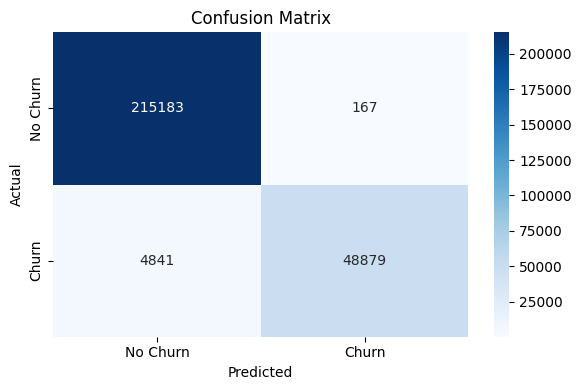

ROC AUC Score: 0.9913


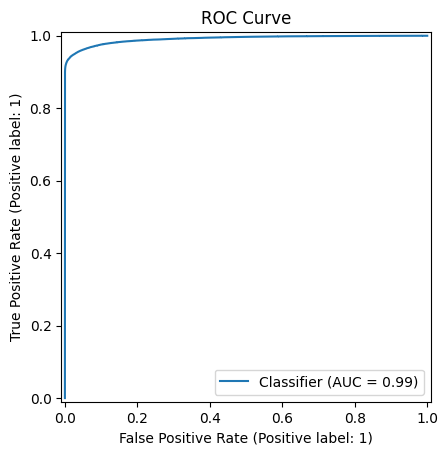

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../outputs/xgb_confusion_matrix.png")
plt.show()

# ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_proba_xgb)
print(f"ROC AUC Score: {roc_auc:.4f}")

RocCurveDisplay.from_predictions(y_test, y_proba_xgb)
plt.title("ROC Curve")
plt.savefig("../outputs/xgb_roc_curve.png")
plt.show()


In [46]:
import pandas as pd

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    "customer_id": ids_test.reset_index(drop=True),
    "actual_churn": y_test.reset_index(drop=True),
    "predicted_churn": pd.Series(y_pred_xgb),
    "churn_probability": pd.Series(y_proba_xgb)
})

# Save to CSV for Power BI integration
predictions_df.to_csv("../outputs/xgb_churn_predictions.csv", index=False)

print("Predictions saved to '../outputs/xgb_churn_predictions.csv'")



Predictions saved to '../outputs/xgb_churn_predictions.csv'


In [14]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


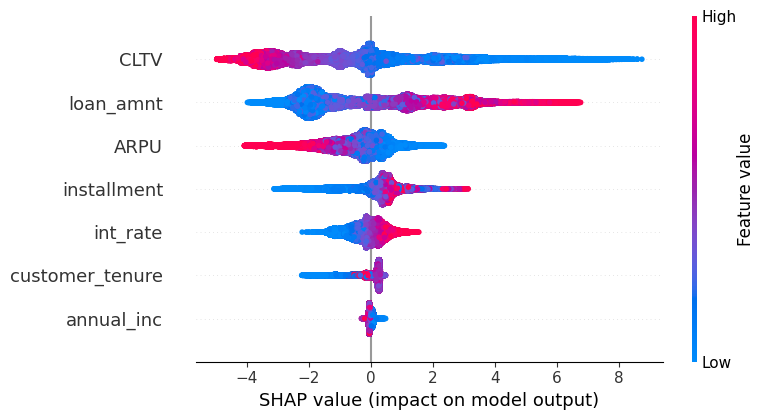

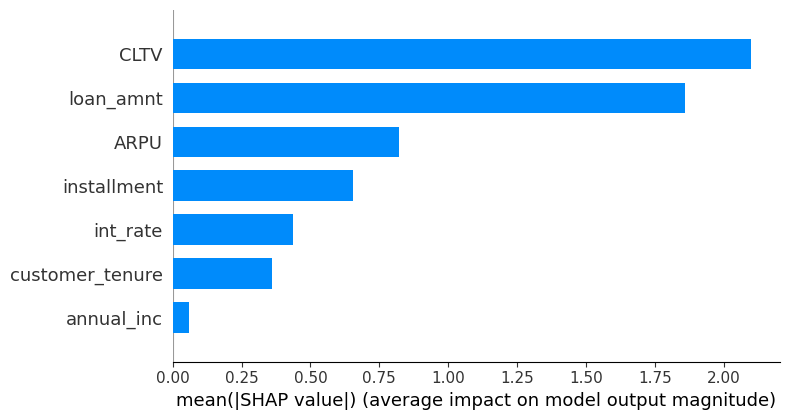

In [44]:
import shap

# Create TreeExplainer
explainer = shap.Explainer(xgb_clf)

# Compute SHAP values for test set
shap_values = explainer(X_test_scaled)

# Summary Plot (Feature Importance Overview)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# Bar Plot of Mean Absolute SHAP Values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")


In [47]:
import matplotlib.pyplot as plt

# SHAP Summary Plot (Beeswarm)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.savefig("../outputs/shap_summary_plot.png", bbox_inches='tight')
plt.clf()

# SHAP Bar Plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar", show=False)
plt.savefig("../outputs/shap_bar_plot.png", bbox_inches='tight')
plt.clf()


<Figure size 800x430 with 0 Axes>